 #### PREDICTING CUSTOMER RETENTION BEHAVIOR IN A TELECOMMUNICATION COMPANY USING MACHINE LEARNING METHODS

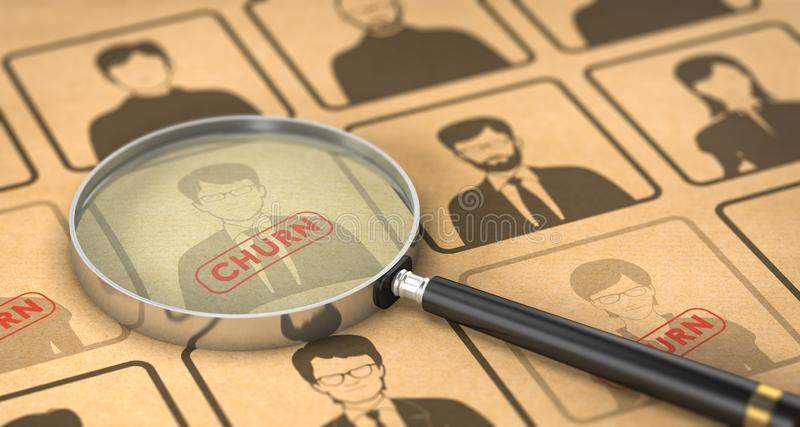

<div style="text-align:center">    
  <a href="https://www.dreamstime.com/customer-churn-rate-concept-client-attrition-d-illustration-customers-analysis-image162267469"</a>
  <!-- image from dreamstime.com -->
</div>


<div style="text-align:center">    
  <a href="https://www.dreamstime.com/customer-churn-rate-concept-client-attrition-d-illustration-customers-analysis-image162267469">image from dreamstime.com</a>
  <!-- more links here -->
</div>



## Sections
[Introduction](#Introduction)
  * [Background](#Background)
  * [Objective](#Objective)
  * [Skill set Employed](#Skill-set-employed)
  * [Machine Learning Models Used](#Machine-Learning-Models-Used)

[Libraries](#Libraries)

[Bringing in the dataset](#Bringing-in-the-dataset)
  * [Sneak-peek into the dataset](#Sneak-peek-into-the-dataset)
  * [First column Dropping](#First-column-Dropping)
  * [Further Columns information](#Further-Columns-information)
  * [Second Dropping](#Second-Dropping)
  
[Descriptive Statistics](#Descriptive-Statistics)

[Data Set Splitting](#Data-Set-Splitting)

[Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Target Attribute : churn value](#Target-Attribute-:-churn-value)
  * [Visualization for Continuous Variables](#Visualization-for-Continuous-Variables)
  * [Addressing Multicollinearity in continuous variables](#Addressing-Multicollinearity-in-continuous-variables)
  * [Visualization for Categorical variables](#Visualization-for-Categorical-variables)
  
[Data Processing](#Data-Processing)
  * [Categorical Features Selection](#Categorical-Features-Selection)
  * [Categorical Features Enconding](#Categorical-Features-Enconding)
  * [Scaling of Continuous Variable](#Scaling-of-Continuous-Variable)
  * [Splitting train set into variables(Dependent and Independent)](#Splitting-train-set-into-variables) 
  * [Dealing With Class imbalance using SMOTE](#Dealing-With-Class-imbalance)
  
[Models Building](#Models-Building)
  * [Baseline Model](#Baseline-Model)
  * [Model Hyper-parameter Tuning](#Model-Hyper-parameter-Tuning)
  * [Machine Learning Models](#Machine-Learning-Models)
    * [Logistic Regression Model](#Logistic-Regression-Model)
    * [Support Vector Classifier Model](#Support-Vector-Classifier-Model)
    * [Random Forest Classifier Model](#Random-Forest-Classifier-Model)
    
[Models Evaluation](#Models-Evaluation)
  * [Evaluation Results Discussion](#Evaluation-Results-Discussion)
  
[Possible Future Improvements](#Possible-Future-Improvements)

[Conclusion](#Conclusion)

[Resource References](#Resource-References)

  
  
  
  
  
  
  
  
  



  
  




## Introduction

#### Background

Several decades ago, before the advent of the industrial revolution and the coming of age of the internet, man's basic needs were simply food, shelter, and clothing. With the world transitioning into a much smaller entity as the years roll by, internet and phone services are fast becoming basic needs to live a quality life. This has brought about several companies around the world which have invested heavily in infrastructures to provide these services. Thus, surely when a customer stops these services of a company, the particular customer would probably land in a competitor's net.


No matter the size of the business, whether small scale or large scale, losing a customer can hurt the business. This is because the business will lose money and/or potential gains, no matter how small. While a single customer leaving the business might not hurt a big business, not identifying a pattern might lead to catastrophic consequences for the business. While exploratory data analysis might help notice, machine learning methods can help prevent the occurrence by spotting the issues beforehand through predictions and/or classification using quality and relevant data in large volumes

#### Objective

This project notebook is basically interested in predicting if a customer would churn or retain the services of the company. The approach to prediction is simply through machine learning models and/or algorithms. It is quite important however to know and state that the task is a **binary** **classification** that would be putting customers into two different classes

Also, we would be describing and exploring the dataset using data analytics methods that are native to the python ecosystem.

#### Skill set employed

The following skills are in use in the course of working on this project:
* Descriptive Statistics
* Univariate and Multivariate Exploratory Data Analysis
* Data Visualization
* Data Pre-processing and Processing
* Data Cleaning
* Addressing class imbalance through SMOTE
* Model optimization through hyper-parameter tuning

#### Machine Learning Models Used

The following are the machine learning algorithm employed to work on this project:
* Logistic Regression
* Support Vector Classification
* Random Forest

## Libraries


We start off the project by importing the libraries to be used. Kindly note that the import would be done as per demands of the situation. The libraries we are starting with at first are not exhaustive

In [5]:
# General libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#The immediate line above helps to set the background of the visuals as white to enhance visibility

print('import successful')

import successful


## Bringing in the dataset

In [6]:
#We can load in the dataset as a pandas dataframe by the use of the pandas library
df=pd.read_excel(r'C:\Users\xplic\Desktop\Utiva Python\Telco_customer_churnxlsx-210822-133008\Telco_customer_churn.xlsx')
print('Dataset Loaded Successfully')

Dataset Loaded Successfully


#### Sneak-peek into the dataset

In [7]:
# Checking the number of rows and columns in the whole dataset
print('The dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

#We can look at the top 6 rows of the dataset(column header row inclusive)
df.head()


The dataset contains 7043 rows and 33 columns


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


From above, we can see that the dataset contains 33 attributes(columns) and 7043 rows. The column called the 'Churn Value' is the target column. It is the column that holds the predictions from the classification algorithms. The column is a result of binary classification. For a customer that has left the company, he/she would take a value that is equal to 1, answering 'yes' to the question that the customer has left the company. For a customer still using one or more of the company's servives, he/she would have a churn value that is equal to 0, answering 'no' to the question that the customer has left the company 

The metadata containing information about the columns of the dataset can be found [here](https://import.cdn.thinkific.com/507876/courses/1446058/DataDescription-210728-121844.txt)

#### First column Dropping

Looking at the column CustomerID, it is a unique identifier that is particular to a specific customer. Although this might be important for data-pipelining and in database ecosystem, it does not provide the desired variability needed for pattern identification. Hence, without further ado, we proceed to drop this column as shown below;

In [8]:
# Dropping the CustomerID column using the Pandas drop feature on our dataset dataframe
df.drop(columns={'CustomerID'},inplace=True)
print('CustomerID column has been dropped successfully')

#We proceed to check the top rows to see if this was truly applied
df.head()

CustomerID column has been dropped successfully


,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Our dataset now has 32 columns with the number of rows unchanged.

#### Further Columns information

By using the info feature of the pandas library, we can get information like the number of rows in each column(the number of filled rows per column which gives the missing values) and the datatype  of the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

From the above, it is quite interesting to note that only 1 column(Churn Reason column) has unfilled values. Others are seen to be filled to the brim. Unsuprisingly, we seem to have a reason why this particular column has a lot of missing values as explained below:

The column is stating the reason why a customer will exit the company. Expectedly, customers that are still using the service of the company will have no churn reason 'yet'. This incredibly has given us an insight into the number of customers outside the company servicing and the number of customers within the serviceability of the company.

Let us take a further look at the percentage of missing values that the column has below:

In [11]:
## We employ the use of the is.null(is.na method could also be used instead) pandas feature 
df['Churn Reason'].isnull().sum()

5174

So,5174 out of a total 7043 are empty. We can get the percentage or fraction missing using the code block below;


In [12]:
print('In the Churn Reason column, a total percentage of {} % is for missing values.'.format(df['Churn Reason'].isnull().sum()*100/7043))

In the Churn Reason column, a total percentage of 73.46301292063042 % is for missing values.


This is quite large a percentage for a column and this makes this column the second we would be dropping.

#### Second Dropping

In [13]:
#We use the same method as we applied initially with us having to change the column name only this time
df.drop(columns={'Churn Reason'},inplace=True)
print('Churn Reason column has been dropped successfully')

#We proceed to check the top rows to see if this was truly applied
df.head()

Churn Reason column has been dropped successfully


,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340


From the column information above (the .info() method), we can see something interesting. The 'Total value' column has its values as type object (indicative of a string). This is weird as charges talk about amount which would simply mean they should be numeric. Let us take a specific look at this column in particular.

In [14]:
#We check the data type
df['Total Charges'].dtype

dtype('O')

We convert to the float type as follows;

In [15]:
df['Total Charges']=df['Total Charges'].astype(float)

ValueError: could not convert string to float: ''

Running the above, we can see that there are some non-numeric values preventing the transition. They are simply empty strings. Let us get the index where we have these empty strings. Kindly understand that they are not empty, but the empty strings are used as a place holder. 

In [16]:
df[df['Total Charges']==' '].index

Int64Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')

From above, we can see that there are 11 rows in the Total Charges column where in the real sense, we do not have values. We proceed to remove these rows as follows;

In [17]:
df.drop(index=[2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840],inplace=True)

We recheck the shape(dimension of the dataframe to see if the change was effected)

In [18]:
df.shape

(7032, 31)

Yes, it was as we have a decrease in value from 7043 to 7032. Now let us convert the values in the column to the right data type as shown above

In [19]:
df['Total Charges']=df['Total Charges'].astype(float)
print('Conversion of values from object type to numeric type successful')

Conversion of values from object type to numeric type successful


Now, let us recheck the columns and the datatypes:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7032 non-null   int64  
 1   Country            7032 non-null   object 
 2   State              7032 non-null   object 
 3   City               7032 non-null   object 
 4   Zip Code           7032 non-null   int64  
 5   Lat Long           7032 non-null   object 
 6   Latitude           7032 non-null   float64
 7   Longitude          7032 non-null   float64
 8   Gender             7032 non-null   object 
 9   Senior Citizen     7032 non-null   object 
 10  Partner            7032 non-null   object 
 11  Dependents         7032 non-null   object 
 12  Tenure Months      7032 non-null   int64  
 13  Phone Service      7032 non-null   object 
 14  Multiple Lines     7032 non-null   object 
 15  Internet Service   7032 non-null   object 
 16  Online Security    7032 

## Descriptive Statistics

Here, we shall be taking a look at the columns statistically. The numeric columns(float and int data type columns) summary can be found using the describe method as shown below:

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7032.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7032.0,93523.032565,1865.515958,90001.000000,92102.000000,93552.500000,95354.000000,96161.000000
Latitude,7032.0,36.283307,2.456118,32.555828,34.030915,36.391777,38.227285,41.962127
Longitude,7032.0,-119.799215,2.157588,-124.301372,-121.815412,-119.735410,-118.043237,-114.192901
Tenure Months,7032.0,32.421786,24.545260,1.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7032.0,64.798208,30.085974,18.250000,35.587500,70.350000,89.862500,118.750000
Total Charges,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000
Churn Value,7032.0,0.265785,0.441782,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7032.0,58.715301,21.531321,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7032.0,4401.445108,1182.414266,2003.000000,3469.750000,4527.500000,5381.000000,6500.000000


From the above, we can make some deductions;
* The count column see to have only have 1 as its value (SD=0 ;meaning no deviations from the mean value). We shall confirm this as we go further
* The churn score range from 5 minimum to a maximum of 100
* The tenure month has a minimum of 1 month to 3 years (so the customers considered are those who have used at least one month and a maximum of 3 years (72 months)
* The total charges seem to be increasing at par with the tenure month. This makes absolute sense as customers who have stayed longer would probably spend more.

More insights would be obtained during the exploratory phase

### Data Set Splitting

The aim of this action is to have a a part of the data as our train set while we have a part as our train set. The test set is what we shall use to test the efficiency of our models. The objective reason for taking this action is to prevent against what is called **snopping bias**. This makes sure the evaluation would be on a set that the model has not come across. It does not make sense to test the model with a dataset it has seen before. This helps guide againt overfitting and also prevent the data model from behaving 'foolishly' in the face of data it has not seen before. We do this as follows:

In [20]:
#We import the functionality from scikit learn library
from sklearn.model_selection import train_test_split

#Then we proceed to split our dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print('Train set: {} rows x {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows x {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

Train set: 5625 rows x 31 columns
 Test set: 1407 rows x 31 columns


From the above, we can see that the splitting allocated 80% of the dataset for training while the remaining 20% is there evaluate the model. Next up is the exploratory data analysis phase

## Exploratory Data Analysis

Here, we take a further look at the columns by employing visualizations and pandas 

Let us take a look at why customers are even leaving: We can find this in the churn reason column as follows:

<AxesSubplot:xlabel='count', ylabel='Churn Reason'>

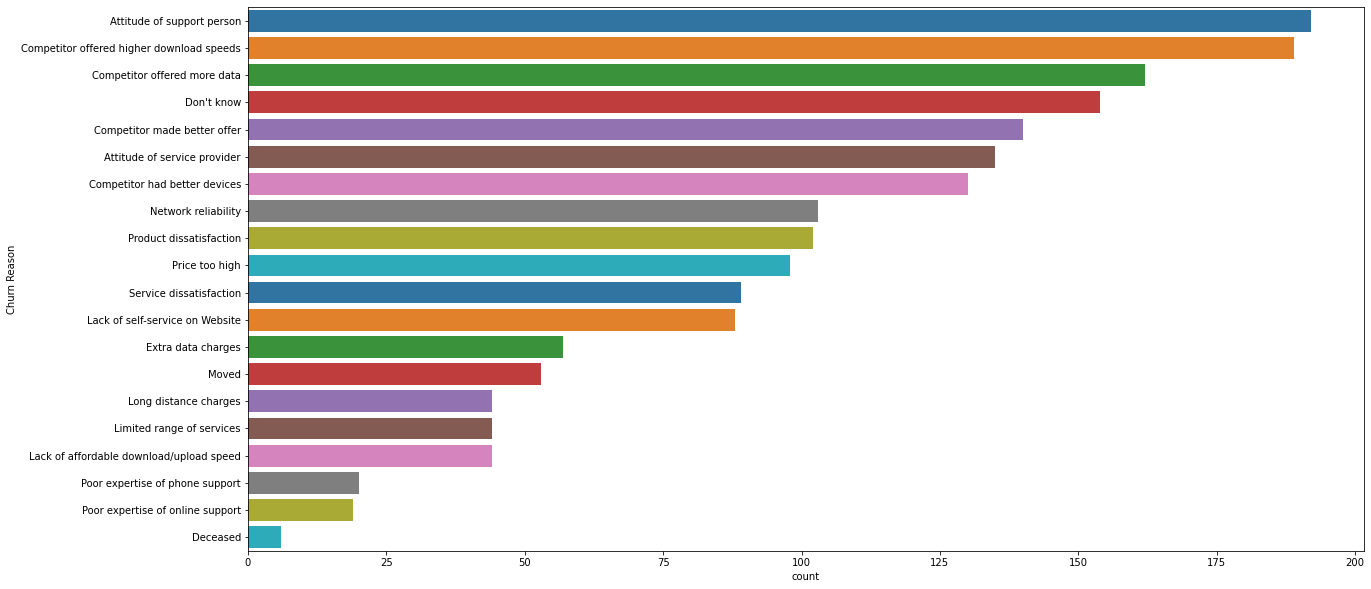

In [3]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y= "Churn Reason", data=dff, palette="tab10", order= dff["Churn Reason"].value_counts().index)

As we can see from the above, customers are majorly leaving due to ways in which customer service handle requests. The company can take a look at this. Also, due to better technological expertise in terms of the download speeds and other service parameters. To retain more customers, the company should on the overall improve their operations in terms of service delivery and support provision.

Expertise of support service is quite good as it led to a little or no churning. However, the attitude of the delivery should be worked on by customer service officials

Now, let us work with other column attributes

In [20]:
columns=list(df.columns)
for column in columns:
    print(df[column].value_counts())

1    7032
Name: Count, dtype: int64
United States    7032
Name: Country, dtype: int64
California    7032
Name: State, dtype: int64
Los Angeles      304
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Sultana            4
Redcrest           3
Cupertino          3
Ben Lomond         3
Independence       3
Name: City, Length: 1129, dtype: int64
92173    5
92201    5
92057    5
90010    5
92061    5
        ..
92408    3
95569    3
92585    3
95014    3
93526    3
Name: Zip Code, Length: 1652, dtype: int64
34.102084, -118.451629    5
33.079834, -117.134275    5
32.677716, -117.047666    5
34.119363, -117.855059    5
33.054579, -117.25665     5
                         ..
40.363446, -123.835041    3
37.306612, -122.080621    3
36.869584, -118.189241    3
34.084909, -117.258107    3
33.739412, -117.173334    3
Name: Lat Long, Length: 1652, dtype: int64
34.108833    5
33.874224    5
33.391181    5
34.167800    5
33.830453    5
         

Of interest here, we can see the following deductions:
* We are going to drop the count column as it is less useful. It has a single value all through which does not provide the needed variability
* The country of origin of the dataset is United states (no variability needed for pattern noticing by algorithms); This makes this column a candidate for dropping
* Only one state is considered 'Los Angeles' (no variability needed for pattern noticing by algorithms); This makes this column a candidate for dropping
* There are a total of 1129 cities. It is very difficult to make a numeric feature out of this. We have to make numeric features as the algorithms only recognize numbers. This makes the column a candidate for dropping
* There are 1652 unique zipcode values. Although numeric, it makes reference to location which is not needed in this kind of exercise. This makes it a candidate for dropping
* Lat, Long column with Latitude and Longitude column are quite similar. They may be useful in location algorithms, they are less useful here and as such, they are a candidate for dropping.

We can proceed to drop these columns below


In [21]:
cols_to_drop=['Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude']
train_df.drop(columns=cols_to_drop,inplace=True)
test_df.drop(columns=cols_to_drop,inplace=True)
#We drop these columns from both the test and train datasets

C:\Users\xplic\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
print(train_df.shape)

print('\n')

print(test_df.shape)

(5625, 23)


(1407, 23)


From the above, we can see that there are 23 columns left. We can eplore our dataset more from here

#### Target Attribute : churn value

Here, let us take a look at the count of customers that have left and those still with the company: We previously stated that customers that have left have a churn value of **1** while those left have a churn value of **0**

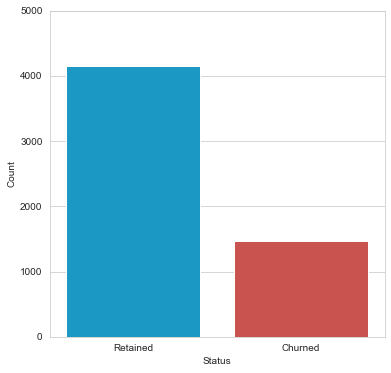

In [24]:



fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Churn Value', data=train_df, palette=['#00A5E0', '#DD403A'], ax=ax)
ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count');
ax.set_ylim([0, 5000]);

As we can see above, the percentage difference between the retained and churned customers is quite high. Let us get the actual percentage below;

In [25]:
train_df['Churn Value'].value_counts(normalize=True) * 100

0    73.795556
1    26.204444
Name: Churn Value, dtype: float64

From above, we can see that 74% of the customers are retained while 26% of the customers have left the service of the company. We shall address this imbalance later before the onset of the machine learning. Let us do more exploration!


Now, let us split the columns using their data types.This is because different data types have different visualization approaches. While int and float type columns are continuous, the others are categorical. We shall exclude the target attribute in both cases. A quick reminder of what our data types look like is shown below;

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5625 non-null   object 
 1   Senior Citizen     5625 non-null   object 
 2   Partner            5625 non-null   object 
 3   Dependents         5625 non-null   object 
 4   Tenure Months      5625 non-null   int64  
 5   Phone Service      5625 non-null   object 
 6   Multiple Lines     5625 non-null   object 
 7   Internet Service   5625 non-null   object 
 8   Online Security    5625 non-null   object 
 9   Online Backup      5625 non-null   object 
 10  Device Protection  5625 non-null   object 
 11  Tech Support       5625 non-null   object 
 12  Streaming TV       5625 non-null   object 
 13  Streaming Movies   5625 non-null   object 
 14  Contract           5625 non-null   object 
 15  Paperless Billing  5625 non-null   object 
 16  Payment Method     5625 

In [23]:
col=list(train_df.columns)
continuous=[]
categorical=[]

for i in col:
    if train_df[i].dtype=='int64':
        continuous.append(i)
    elif train_df[i].dtype=='float64':
        continuous.append(i)
    else:
        categorical.append(i) 

In [24]:
continuous.remove('Churn Value')
#We are excluding Churn Value column as we already did the visualization needed on it

print(continuous)
print('\n')
print(categorical)

['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']


['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']


#### Visualization for Continuous Variables


we use the histogram visualization here. We have a plot of count of continuous variables against the variables themselves:

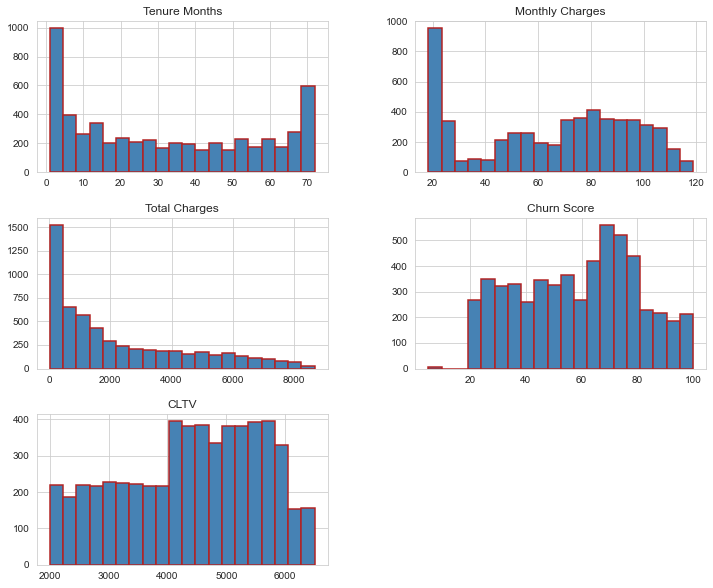

In [29]:
train_df[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(3, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

From the above visuals, we have the following observations:
* Safe for the extreme values, the tenure months column is pretty uniform in distribution. Most of the customers are new ones since the largest count are those with tenure months=1. We also have pretty much loyal customers with tenure months above 60 months
* The monthly charges are fairly uniform in distribution(safe for the minimum value)
* Most of the customers are not incurring very high total charges. In fact, a very small percentage of the customers have maximum total charges. This is as a direct result of the number of months they have spent with the company or better still, the number of services subscribed to. It only makes sense that customers who have subscribed to a higher number of services definitely would have to sepnd more.
* Many of the customers have a churn score of within the 75 mark. This is pretty disturbing as the higher the churn score, the greater the probability to churn. Efforts like targeted customer service provision should be made so as to hear the different reasons why they are disatisified.
* A good number of the customers have spent real good. Although there are not much marked difference with the lower sides

#### Addressing Multicollinearity in continuous variables

Here, we want to check the correlation between individual columns of the continuous variables. We are going to use the Pandas' .corr() method

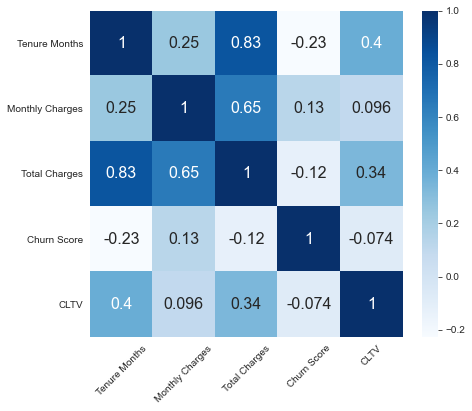

In [30]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(train_df[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);

What we can see from above is that there is some level of multicollinearity between some of the columns. The columns tenure months and Total charges are highly correlated (0.83). This makes sense because, a customer that has used a higher number of months will definitely incur more total charges. To prevent multicollinearity in our models, we have to drop one of the two for each other, What we drop will be dependent on how much both are correlated with the target feature.

We can also see that Total charges and monthly charges are quite correlated(0.65). But, due to the fact that the values are still within range (less than 0.7), we can decide not to drop as multicollinearity will not arise.

However, we can see that it is best we drop the Total charges column already since its exodus would eliminate any element of multicollinearity susceptibility. However, we have to confirm how it does affect our target variable relative to the column in which it is multicollinear. We plot a correlation matrix to show this

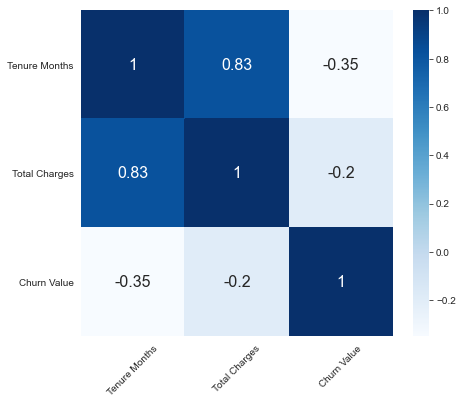

In [31]:
multi_check=['Tenure Months','Total Charges','Churn Value']

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(train_df[multi_check].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);


From what we have here, both are lowly negatively correlated. However, tenure months is more negatively correlated to the target feature. This provides a confirmation that we will have to drop the Total charges column as follows:

In [25]:
train_df.drop(columns={'Total Charges'},inplace=True)
test_df.drop(columns={'Total Charges'},inplace=True)

Let us still investigate the remaining continuous variables a little further, using a mix of box plots and histograms as follows. Firstly, we make some definitions:

For Tenure Months:

<AxesSubplot:xlabel='Churn Value', ylabel='Tenure Months'>

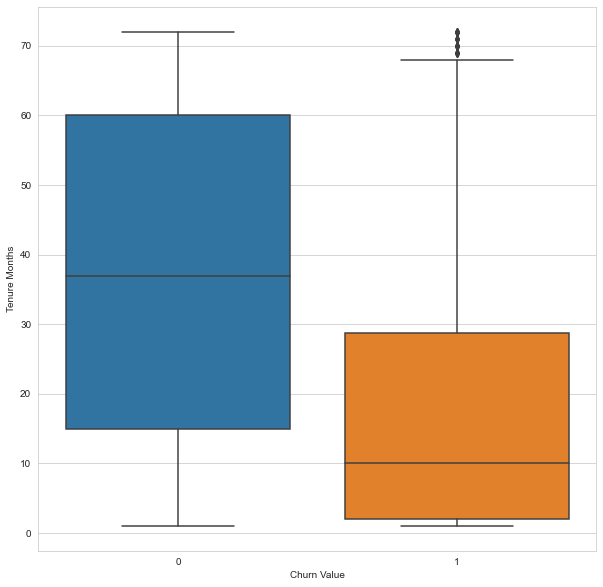

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Churn Value', y='Tenure Months', data=train_df)

There seem to be a marked difference between tenure months distribution and the churn value types. Customers with a higher number of tenure months seem to be retained better than the new ones. This supports the saying that it is quite hard to acquire a new customer than not losing existing ones. This speaks about brand loyalty as the years roll by. Also, there are no serious outlier cases too.

For Monthly charges:

<AxesSubplot:xlabel='Churn Value', ylabel='Monthly Charges'>

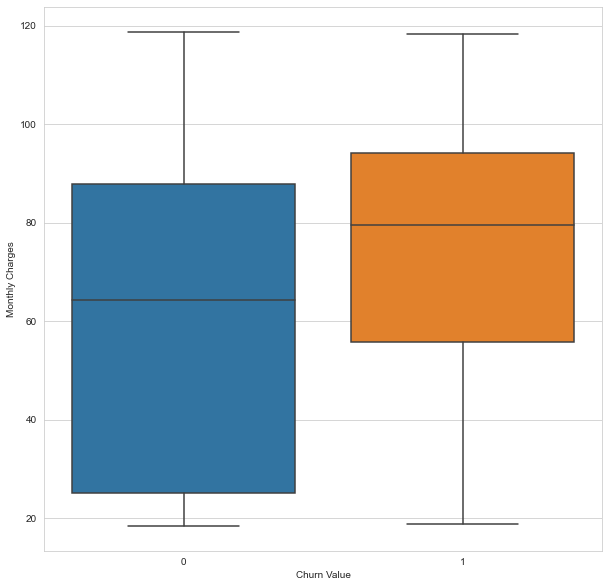

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Churn Value', y='Monthly Charges', data=train_df)

This is quite interesting as we have no outliers. However,customers that have churned are the ones that pay a higher value in terms of monthly charges. This could mean they are getting same services from competitors at lower prices.

For Churn Score:

<AxesSubplot:xlabel='Churn Value', ylabel='Churn Score'>

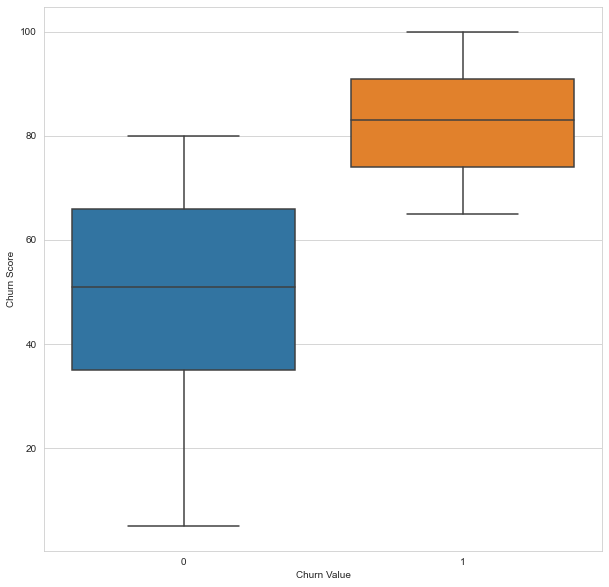

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Churn Value', y='Churn Score', data=train_df)

There is an unsurprising ,marked difference between the range of values for customers that are retained and the ones that have churned. Reason for this is quite simple.The higher the churn score, the greater the probability that a customer will churn. Intrestingly, no outliers but efforts should be made to reduce the churn score for customers to as low as possible, as a higher churn score speaks of imminent churning

For CLTV:

<AxesSubplot:xlabel='Churn Value', ylabel='CLTV'>

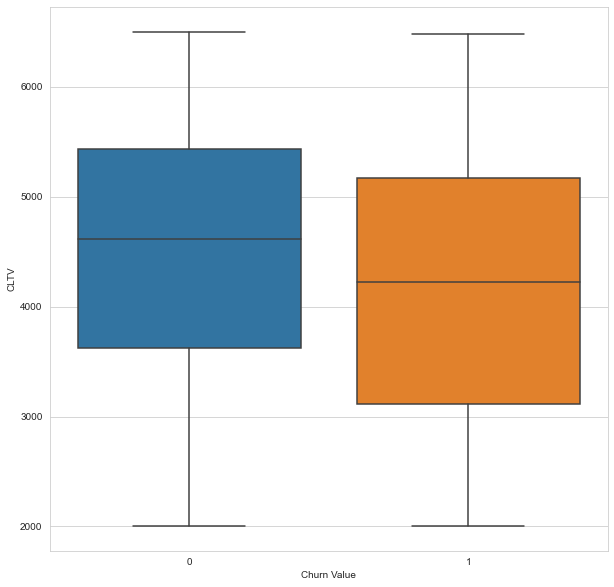

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Churn Value', y='CLTV', data=train_df)

Surprisingly, there is a little marked difference in range for the value classes. This is quite disturbing because customers who have a good life time value are leaving the company. This could mean that on the overall, the customers are not satisfied even though they want to spend more.

### Visualization for Categorical variables

Here, we shall be exploring visualization with the categorical variables. Kindly recall we have a list that holds them from above. Let us drive straight into them.

In [38]:
print(categorical)

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']


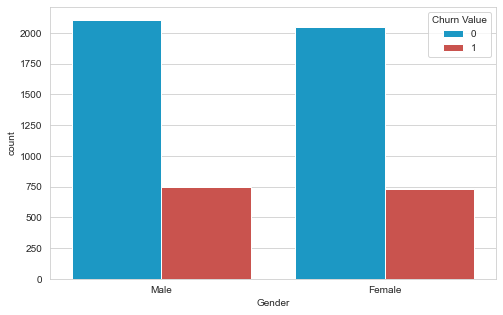

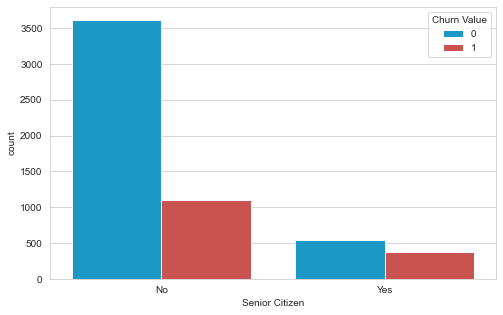

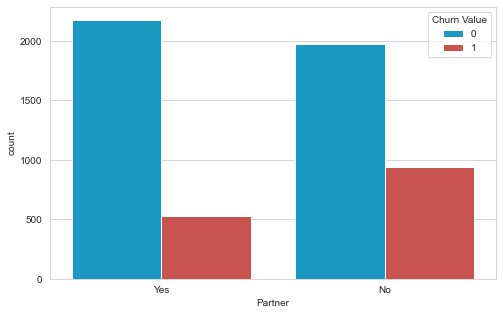

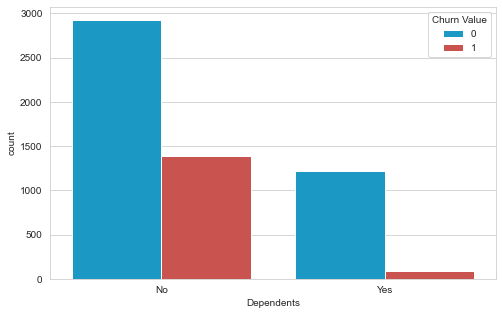

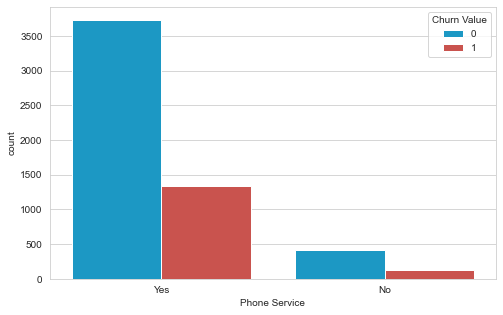

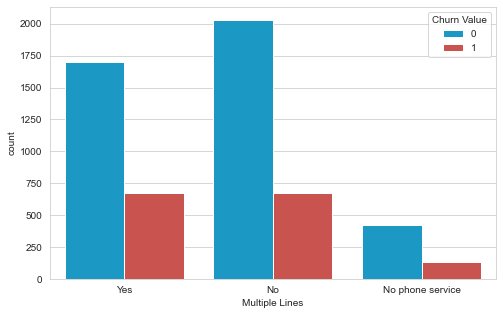

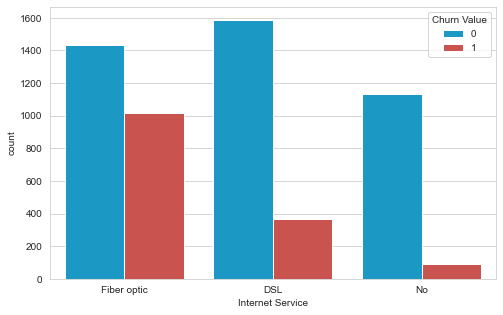

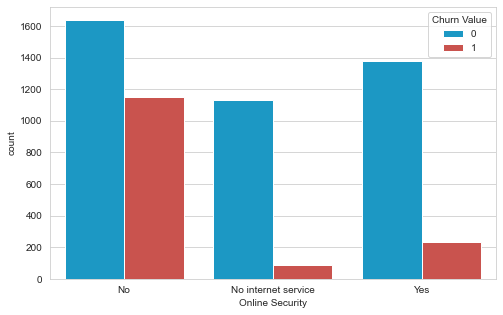

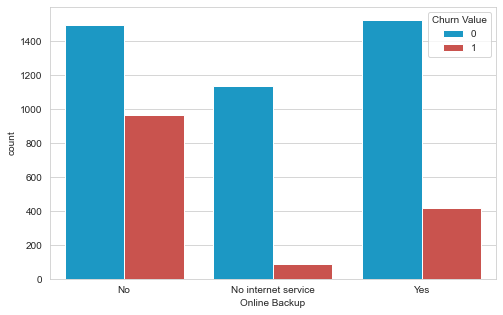

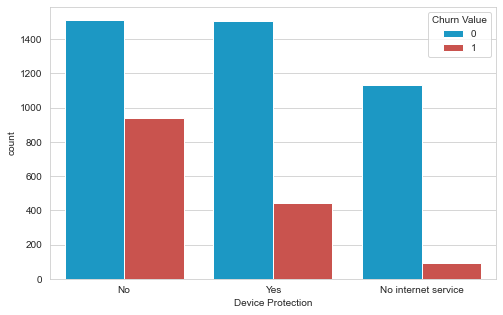

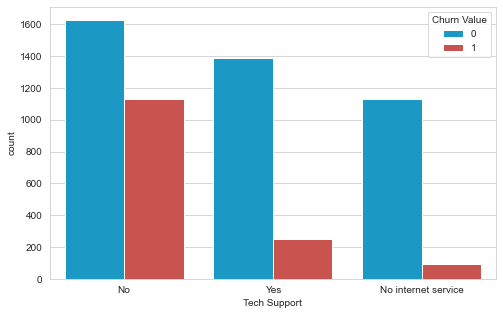

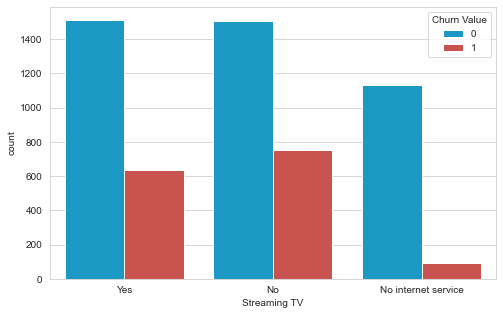

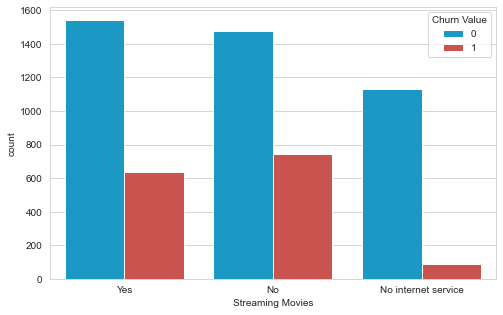

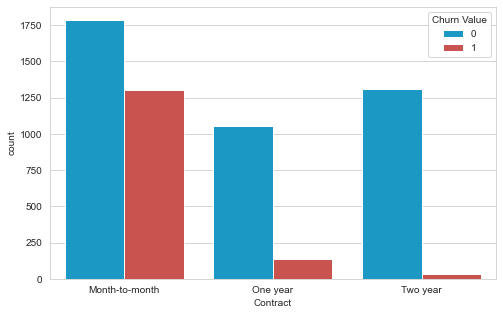

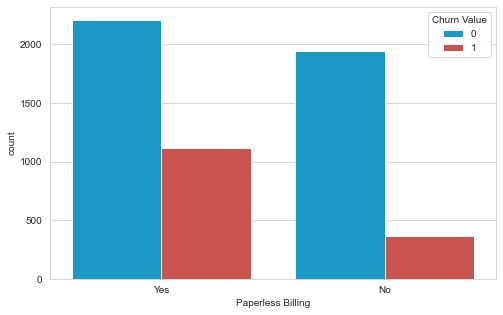

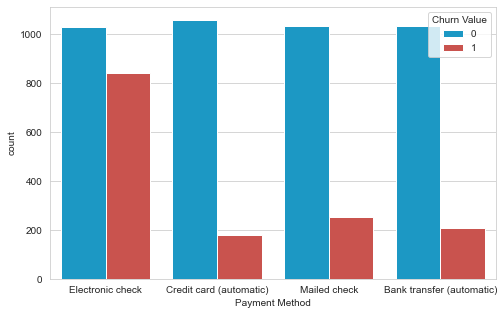

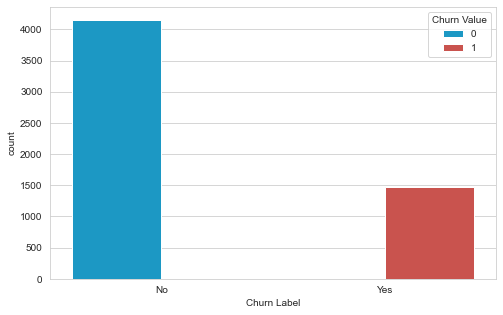

In [39]:
for col in categorical:
    fig = plt.figure(figsize=(8,5))
    sns.countplot( data = train_df, x = train_df[col],hue='Churn Value',palette=['#00A5E0', '#DD403A'])

We notice the following points about the categorical variables:
* There are roughly the same number of female customers as male customers. They also have similar churn rate.
* The demography of age falls toward the youth age. There are clearly more young and middle-adged customers than senior citizens
* There are almost equal number of single and engaged(married or not single) customers
* Most Customers are without dependents. Furthermore, those without dependents are less likely to churn
* Most customers use a phone service. Customers that use a phone service are not likely to churn
* For customers with a phone service, using multiple lines and not using multiple lines are roughly the same count
* Fiber optic is the most popular internet service. Intrestingly, some customers do not use the internet service of the company. Customers who use the fibre optic internet service are  markedly likely to churn
* Surprisingly, for those that use the internet service, most do not have online security. Most customers with no oline security are likely to churn. This should be looked into.
* For customers that use the internet service, most do not have an online or cloud backup. Hence it is very key to maintain excellent service levels at all times since this can easily cause frustration. Customers without online backup are likely churners
* Most customers with internet service have no device protection. Although this is not really clearly marked. However, the bulk of churners here have no device protection. Having no tech support supports churning.
* Most customers with internet service have no tech support. This is worrisome asthe bulk of churners here have no device protection
* For customers with internet services, there is a balance between those who stream movies and those who do not
* Most customers are on a month-to-month contract. This might be due to living from pay check to pay check. In the face of excellent service delivery, this should be discouraged by giving incentives as its availability makes the decision to churn quite an easy one
* Most customers do not subscribe to payperless billing. Hence, payment information details within the company's architecture should be excellent to avoid litigation
* The most popular payment method is through e-checks. It also contains the bulk of churners.
* Most of the customers are still within the company services (The target variable is a direct off shot of this column. In fact, it is through encoding that we derive values for the target attribute from here. Since it came encoded, this column should be infact dropped as it is surplus to requirement).

In [26]:
train_df.drop(columns={'Churn Label'},inplace=True)
test_df.drop(columns={'Churn Label'},inplace=True)

In [27]:
#Let us check the shape of the train datasets.
train_df.shape

(5625, 21)

We have 21 column left(target variable inclusive). So basically, there are 20 ttributes at present to make a prediction off.

## Data Processing

Here, we are concerned with turning features( especially categorical features) into machine readable format. This is essential so as to make our models work with these feastures. At present, there are 16 variables that are categorical which we might want to pre-process. Kindly recall that we have dropped some columns earlier with the reasons for dropping adequately stated.

### Categorical Features Selection

What we want to do here is to check for continuous variables that can be dropped using their distribution types. By confirming their p-value and chi square value, we can decide to drop them if they are well below defined ranges. We can do that as follows:


In [28]:
categorical.remove('Churn Label')

In [29]:
#We start by importing the stat package to use
from scipy.stats import chi2_contingency
chi2_array, p_array = [], []
for column in categorical:

    crosstab = pd.crosstab(train_df[column], train_df['Churn Value'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
13,Contract,927.620670,3.713050e-202
7,Online Security,671.213112,1.769801e-146
10,Tech Support,637.667223,3.406606e-139
6,Internet Service,575.656201,9.950483e-126
15,Payment Method,516.739389,1.124297e-111
8,Online Backup,461.119928,7.397412e-101
9,Device Protection,425.138431,4.812411e-93
3,Dependents,337.171667,2.635353e-75
12,Streaming Movies,296.718231,3.702157e-65
11,Streaming TV,294.530002,1.105663e-64


As we can see, Gender and Phone service have chi square value with p-values less than 0.05. If we recall from the EDA, these values have less variability in count of their unique types. Hence, it makes sense to drop them below as follows:

In [30]:
train_df.drop(columns={'Phone Service','Gender'},inplace=True)
test_df.drop(columns={'Phone Service','Gender'},inplace=True)


C:\Users\xplic\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Categorical Features Enconding

The choice enconder here would be the one-hot encoding method. This is preferred to label encoding as it does not have rank problems since our columns are not even ordinal. We proceed as follows:

In [31]:
#we start by passing the columns we want to encode(one hot encoding into a list)
oh=['Senior Citizen', 'Partner', 'Dependents', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
train_enc = pd.get_dummies(train_df, columns=oh, drop_first=True)
test_enc = pd.get_dummies(test_df, columns=oh, drop_first=True)
train_enc.head()

,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,24,93.00,0,29,5886,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1,40,78.85,0,45,5257,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,4,65.60,0,44,4552,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,4,55.50,0,66,2328,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,64,24.90,0,62,5038,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,1


### Scaling of Continuous Variable

Now, we want to scale the continuous variables. This aims to change the range of values. We are going to use the standard scaler here as follows:

In [32]:
continuous.remove('Total Charges')
print(continuous)

['Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV']


In [33]:
# We start by importing the standard scaler from scikit learn.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


train_enc[continuous] = scaler.fit_transform(train_enc[continuous])
test_enc[continuous] = scaler.fit_transform(test_enc[continuous])

In [34]:
train_enc.head() 

,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,-0.335339,0.943953,0,-1.379823,1.254609,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1,0.316564,0.474005,0,-0.636246,0.723032,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,-1.150218,0.033947,0,-0.682719,0.127226,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,-1.150218,-0.301494,0,0.339699,-1.752308,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1.294419,-1.317778,0,0.153805,0.537952,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,1


In [35]:
train_enc['Churn Value'].value_counts()

0    4151
1    1474
Name: Churn Value, dtype: int64

### Splitting train set into variables

We can now proceed to split the train set into variables as follows. Kindly recall that the target variable which us the churn value is the target variable.

In [36]:
y_train = train_enc['Churn Value']
x_train = train_enc.drop('Churn Value', 1)

In [37]:
y_test = test_enc['Churn Value']
x_test = test_enc.drop('Churn Value', 1)

## Dealing With Class imbalance

Kindly remember from above that the target variable has a kind of imbalance with one type of the class overly outweighing the order. To deal with this, we use SMOTE ('Synthetic Minority Oversampling Technique') algorithm.

It is necessary to do this because we need to prevent the models from leaning on to the majority while predicting. Let us take a look at the imbalance once more:

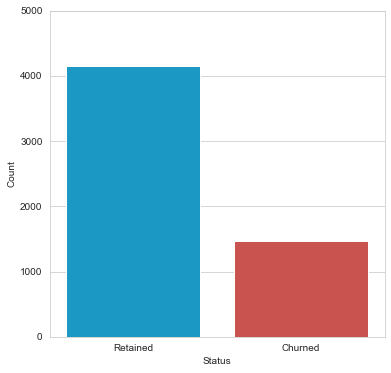

In [66]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Churn Value', data=train_df, palette=['#00A5E0', '#DD403A'], ax=ax)
ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count');
ax.set_ylim([0, 5000]);

Now, let us use the SMOTE to address this:

In [38]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = over.fit_resample(x_train, y_train)

y_train.value_counts()

0    4151
1    4151
Name: Churn Value, dtype: int64

In [39]:
x_train.shape

(8302, 29)

In [87]:
y_train.shape

(8302,)

From the above, we can see that the values have been correctly made up by SMOTE and now, the class imbalance is gone

## Models Building

### Baseline Model

A baseline model is a sort of reference to which we know how good or bad our model has fared based on particular metrics. The metric to use here is the **f1 score**. A rule of thumb is that our models must perform better than the baseline model. In an instance where this is not in play, then the model has fared really bad and we should make an overall check as to what might be the problem.

Although we use the f1 score as the scoring metric here, generally the built model should have a greater accuracy metric score than the baseline model. Since this is a binary classifier, the accuracy score would be 50%. What this mean is that the baseline model has the capacity of outputting a prediction to the tune of 50% accuracy. 

We compute the baseline model as using the f1 score-route as follows;

* Precision = tp/(tp+fp)

* Recall =tp/(tp+fn)

* f1=(2 * Precision * Recall)/(Precision + Recall)

We go ahead to do this for the two categories of churn values, then we get the average of the two f1 scores.

In [71]:
train_enc['Churn Value'].value_counts()

0    4151
1    1474
Name: Churn Value, dtype: int64

In [72]:
# When churn value == 0 (when customer is retained)
precision_a = 4151/(4151+1474)
recall_a = 4151/4151

f1_a= (2*precision_a * recall_a)/(precision_a + recall_a)

#When churn value == 1 (when customer has churned)
precision_b= 1474/(1474+4151)
recall_b= 1474/1474

f1_b=(2 * precision_b * recall_b)/(precision_b + recall_b)

#The f1 score is the average of the two
f1 = (f1_a + f1_b)/2

print(f1)

0.6322461711142091


As we can see above, the baseline model has a 63% accurracy. However, each of the model we are going to use should have an accurracy better than this. We see this in the next section

## Model Hyper-parameter Tuning

This is an optimization problem or issue. What we have to do here is to ensure that the hyperparameters passed into our models are the optimum values. This will ensure an accurracy of our result. 

Kindly recall that we have decided to use the following algorithms earlier:
* Logistic Regression
* Support Vector Classifier
* Random Forest Classifier

Kindly note that the optimum parameters used in this work are those that have been confirmed in other studies involving their use.

### Machine Learning Models 

#### Logistic Regression Model

In [40]:
# We import the model from scikit learn
from sklearn.linear_model import LogisticRegression

# We import the tuning dependency
from sklearn.model_selection import GridSearchCV

#lr = LogisticRegression(random_state=42)

# We pass in the optimal hyperparameters for the model
param_grid = {
    'max_iter': [100],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# We apply the optimal hyperparameter before training the model
lr= GridSearchCV(estimator=LogisticRegression(random_state=42),
                      param_grid=param_grid,
                      scoring='f1',
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

#training the algorithm with the data
lr.fit(x_train, y_train)

# creating the prediction
y_hat1 = lr.predict(x_test)





C:\Users\xplic\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.         0.90328912 0.89415121        nan 0.84588152
 0.9164163  0.91104525        nan 0.91767954 0.92559755 0.92508613
        nan 0.92949416 0.92764033 0.92839623        nan 0.93000619
 0.93011312 0.93011573        nan 0.93062786 0.93063518 0.93051147]
  warnings.warn(


#### Support Vector Classifier Model

In [95]:
#We import the model from scikit learn
from sklearn.svm import SVC

#svc = SVC(probability=True, random_state=42)


# We pass in the optimal hyperparameters for the model
param_grid = tuned_parameters = [{'kernel': ['rbf'],
                                  'gamma': ['scale', 'auto'],
                                  'C': [.1, 1, 2]},
                                 {'kernel': ['linear'],
                                  'C': [.1, 1, 10]}
                                ]

# We apply the optimal hyperparameter before training the model
svc= GridSearchCV(estimator=SVC(probability=True, random_state=42),
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

#training the algorithm with the data
svc.fit(x_train, y_train)

# creating the prediction
y_hat2 = svc.predict(x_test)





#### Random Forest Classifier Model

In [96]:
#We import the model from scikit learn
from sklearn.ensemble import RandomForestClassifier

# We pass in the optimal hyperparameters for the model
#rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [6],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

## We apply the optimal hyperparameter before training the model
rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                      param_grid=param_grid,
                      scoring='f1',
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

#training the algorithm with the data
rf.fit(x_train, y_train)

# creating the prediction
y_hat3 = rf.predict(x_test)





## Models Evaluation

In [ ]:
The models shall be evaluated using the f1 score. We compute the evaluations as follows:

In [97]:
# We start by importing the evaluating metric from scikitlearn
from sklearn.metrics import f1_score

#Logistic Regression
f1_1 = f1_score(y_true=y_test, y_pred=y_hat1)
print('The f1 score for the logistic regression model is {}'.format(f1_1))

#Support Vector Classification
f1_2 = f1_score(y_true=y_test, y_pred=y_hat2)
print('The f1 score for the support vector classification  model is {}'.format(f1_2))

#Random Forest Classifier
f1_3 = f1_score(y_true=y_test, y_pred=y_hat3)
print('The f1 score for the random forest classifier  model is {}'.format(f1_3))

The f1 score for the logistic regression model is 0.853628536285363
The f1 score for the support vector classification  model is 0.8457831325301204
The f1 score for the random forest classifier  model is 0.8662721893491124


## Evaluation Results Discussion

As mentioned earlier in the notebook, the models will be evaluated using the f1 score. Logistic regression and SVC performed similarly with an f1-score of 0.85. Random forest classifier performed best however with an f1-score of 0.87. All the models performed better than the baseline model. 

It can be observed that all these models performed excellently. This could be due to the use of optimal parameters for each of the model. Also, by addressing over-fitting, these models were able to perform optimally.


## Possible Future Improvements

* Quality data in large quantity will always produce better results. The volume available can be increased so as to provide the models with more data to learn and/or train from

* It can also be seen that some columns were already engineered. For example 'The Senior Citizen' column. It would be better if the raw data is obtained and then decision is personally made to engineer

## Conclusion

We have been able to build models that performed very well by making sure we adopted best practices. Some vital points were raised in the EDA which could be looked into further by the company. Kindly note that if the models were built without the optimal parameters, we can be sure that we will have a lesser f1 score values.

### THANK YOU!!!!!

## Resource References


* [Predicting Customer Churn with Machine Learning](https://www.kaggle.com/korfanakis/predicting-customer-churn-with-machine-learning?scriptVersionId=73011515) by Orfanakis Konstantinos
* [Metrics and scoring: quantifying the quality of predictions on scikit-learn.org](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
* [Telco-Customer-Churn-Prediction](https://github.com/mohammedali9810/Telco-Customer-Churn-Prediction/blob/master/Telco-Customer-Churn-Prediction.ipynb) by Mohammed Ali